## Extração das subprefeituras

Nesse notebook são extraídos os limites administrativos das subprefeituras da Prefeitura Municipal de São Paulo

Os dados são do projeto GeoSampa da PMSP: https://geosampa.prefeitura.sp.gov.br/PaginasPublicas/_SBC.aspx

In [1]:
import geopandas as gpd
import requests
from io import BytesIO
import os
from config import data_folder
from utils.save_shp import save_shp

In [2]:
def download_subprefs():

    file = os.path.join(data_folder, "subprefs.shp")

    if os.path.exists(file):
        print("Retornando arquivo salvo")
        return gpd.read_file(file)

    print("Carregando do GeoSampa")

    url = ("http://wfs.geosampa.prefeitura.sp.gov.br/geoserver/geoportal/"
           "wfs?version=1.0.0&request=GetFeature&outputFormat=SHAPE-ZIP"
           "&typeName=geoportal:subprefeitura")

    with requests.get(url) as r:
        content = BytesIO(r.content)
        subprefs = gpd.read_file(content)

    save_shp(subprefs, file)

    return subprefs

In [3]:
subprefs = download_subprefs()

Retornando arquivo salvo


<Axes: >

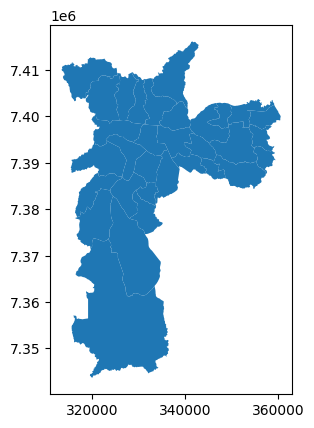

In [4]:
subprefs.plot()